In [1]:
#https://github.com/philipperemy/keras-attention-mechanism/blob/master/attention_dense.py

!git clone https://github.com/philipperemy/keras-attention-mechanism.git

fatal: destination path 'keras-attention-mechanism' already exists and is not an empty directory.


In [1]:
ls -alrt

total 20
drwxr-xr-x 1 root root 4096 Oct 25 16:58 sample_data/
drwxr-xr-x 1 root root 4096 Oct 29 15:16 .config/
drwxr-xr-x 1 root root 4096 Oct 31 14:29 ../
drwxr-xr-x 1 root root 4096 Oct 31 14:30 ./
drwxr-xr-x 5 root root 4096 Oct 31 14:31 keras-attention-mechanism/


In [2]:
cd keras-attention-mechanism

/content/keras-attention-mechanism


In [3]:
import numpy as np

from attention_utils import get_activations, get_data

np.random.seed(1337)  # for reproducibility
from keras.models import *
from keras.layers import Input, Dense, merge

Using TensorFlow backend.


In [0]:
input_dim = 32

#from keras.layers import concatenate
from keras.layers import multiply

def build_model():
    inputs = Input(shape=(input_dim,))

    # ATTENTION PART STARTS HERE
    attention_probs = Dense(input_dim, activation='softmax', name='attention_vec')(inputs)
    #attention_mul = merge([inputs, attention_probs], output_shape=32, name='attention_mul', mode='mul')
    #attention_mul = concatenate([inputs, attention_probs], name='attention_mul')
    attention_mul = multiply([inputs, attention_probs], name='attention_mul')
    print('attention_mul: ', attention_mul.shape)
    # ATTENTION PART FINISHES HERE

    attention_mul = Dense(64)(attention_mul)
    output = Dense(1, activation='sigmoid')(attention_mul)
    model = Model(input=[inputs], output=output)
    return model


In [6]:

if __name__ == '__main__':
    N = 10000
    inputs_1, outputs = get_data(N, input_dim)

    m = build_model()
    m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(m.summary())

    m.fit([inputs_1], outputs, epochs=20, batch_size=64, validation_split=0.5)

    testing_inputs_1, testing_outputs = get_data(1, input_dim)

    # Attention vector corresponds to the second matrix.
    # The first one is the Inputs output.
    attention_vector = get_activations(m, testing_inputs_1,
                                       print_shape_only=True,
                                       layer_name='attention_vec')[0].flatten()
    print('attention =', attention_vector)



attention_mul:  (?, 32)
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
attention_vec (Dense)           (None, 32)           1056        input_2[0][0]                    
__________________________________________________________________________________________________
attention_mul (Multiply)        (None, 32)           0           input_2[0][0]                    
                                                                 attention_vec[0][0]              
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 64)           2112        att

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


Train on 5000 samples, validate on 5000 samples
Epoch 1/20
5000/5000 [==============================] - 1s 158us/step - loss: 0.6886 - acc: 0.5530 - val_loss: 0.6799 - val_acc: 0.6328
Epoch 2/20
5000/5000 [==============================] - 1s 107us/step - loss: 0.6563 - acc: 0.7102 - val_loss: 0.6258 - val_acc: 0.7328
Epoch 3/20
5000/5000 [==============================] - 0s 100us/step - loss: 0.5691 - acc: 0.7680 - val_loss: 0.5218 - val_acc: 0.7854
Epoch 4/20
5000/5000 [==============================] - 1s 102us/step - loss: 0.4597 - acc: 0.8124 - val_loss: 0.4183 - val_acc: 0.8312
Epoch 5/20
5000/5000 [==============================] - 0s 97us/step - loss: 0.3542 - acc: 0.8668 - val_loss: 0.3072 - val_acc: 0.8852
Epoch 6/20
5000/5000 [==============================] - 1s 103us/step - loss: 0.2373 - acc: 0.9238 - val_loss: 0.1860 - val_acc: 0.9446
Epoch 7/20
5000/5000 [==============================] - 1s 104us/step - loss: 0.1225 - acc: 0.9718 - val_loss: 0.0812 - val_acc: 0.9848
E

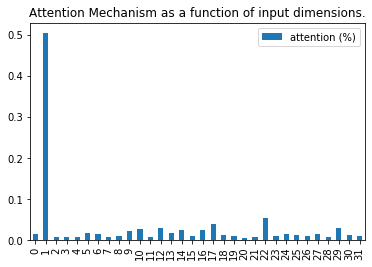

In [7]:
    # plot part.
    import matplotlib.pyplot as plt
    import pandas as pd

    pd.DataFrame(attention_vector, columns=['attention (%)']).plot(kind='bar',
                                                                   title='Attention Mechanism as '
                                                                         'a function of input'
                                                                         ' dimensions.')
    plt.show()